In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
test_file="D:/fish_image/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
train_file="D:/fish_image/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_file="D:/fish_image/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"

In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [7]:
datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2) )

In [8]:
# Load training images
train_generator = datagen.flow_from_directory(
    train_file,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 6225 images belonging to 11 classes.


In [9]:
# Load validation images
val_generator = datagen.flow_from_directory(
    val_file,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1092 images belonging to 11 classes.


# CNN model


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Build the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='models/fish_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, earlystop, lr_scheduler]
)

c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2439 - loss: 2.1245
Epoch 1: val_accuracy improved from None to 0.53571, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.3435 - loss: 1.8780 - val_accuracy: 0.5357 - val_loss: 1.4689 - learning_rate: 1.0000e-04
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4741 - loss: 1.4944
Epoch 2: val_accuracy improved from 0.53571 to 0.64744, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.5059 - loss: 1.4171 - val_accuracy: 0.6474 - val_loss: 1.1541 - learning_rate: 1.0000e-04
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5507 - loss: 1.2894
Epoch 3: val_accuracy improved from 0.64744 to 0.65751, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.5745 - loss: 1.2264 - val_accuracy: 0.6575 - val_loss: 1.0504 - learning_rate: 1.0000e-04
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6139 - loss: 1.1265
Epoch 4: val_accuracy improved from 0.65751 to 0.73260, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.6251 - loss: 1.0907 - val_accuracy: 0.7326 - val_loss: 0.8930 - learning_rate: 1.0000e-04
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.6376 - loss: 1.0190
Epoch 5: val_accuracy improved from 0.73260 to 0.73810, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.6458 - loss: 1.0062 - val_accuracy: 0.7381 - val_loss: 0.8315 - learning_rate: 1.0000e-04
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.6740 - loss: 0.9362
Epoch 6: val_accuracy improved from 0.73810 to 0.74817, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.6813 - loss: 0.9317 - val_accuracy: 0.7482 - val_loss: 0.7695 - learning_rate: 1.0000e-04
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - accuracy: 0.7083 - loss: 0.8643
Epoch 7: val_accuracy improved from 0.74817 to 0.79670, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7096 - loss: 0.8521 - val_accuracy: 0.7967 - val_loss: 0.6628 - learning_rate: 1.0000e-04
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7353 - loss: 0.7774
Epoch 8: val_accuracy did not improve from 0.79670
195/195 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7332 - loss: 0.7783 - val_accuracy: 0.7930 - val_loss: 0.6461 - learning_rate: 1.0000e-04
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.7506 - loss: 0.7200
Epoch 9: val_accuracy improved from 0.79670 to 0.80586, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.7587 - loss: 0.7009 - val_accuracy: 0.8059 - val_loss: 0.5886 - learning_rate: 1.0000e-04
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.7855 - loss: 0.6447
Epoch 10: val_accuracy improved from 0.80586 to 0.86172, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.7892 - loss: 0.6397 - val_accuracy: 0.8617 - val_loss: 0.5015 - learning_rate: 1.0000e-04
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.7980 - loss: 0.5928
Epoch 11: val_accuracy improved from 0.86172 to 0.88736, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8002 - loss: 0.5895 - val_accuracy: 0.8874 - val_loss: 0.4101 - learning_rate: 1.0000e-04
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 971ms/step - accuracy: 0.8251 - loss: 0.5259
Epoch 12: val_accuracy improved from 0.88736 to 0.90476, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.8246 - loss: 0.5300 - val_accuracy: 0.9048 - val_loss: 0.3834 - learning_rate: 1.0000e-04
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.8332 - loss: 0.4986
Epoch 13: val_accuracy improved from 0.90476 to 0.92308, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.8349 - loss: 0.5030 - val_accuracy: 0.9231 - val_loss: 0.3256 - learning_rate: 1.0000e-04
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.8339 - loss: 0.4853
Epoch 14: val_accuracy improved from 0.92308 to 0.93040, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8431 - loss: 0.4805 - val_accuracy: 0.9304 - val_loss: 0.3252 - learning_rate: 1.0000e-04
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 953ms/step - accuracy: 0.8585 - loss: 0.4343
Epoch 15: val_accuracy did not improve from 0.93040
195/195 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8514 - loss: 0.4503 - val_accuracy: 0.9112 - val_loss: 0.3423 - learning_rate: 1.0000e-04
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.8633 - loss: 0.4111
Epoch 16: val_accuracy improved from 0.93040 to 0.94139, saving model to models/fish_cnn_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.8649 - loss: 0.4102 - val_accuracy: 0.9414 - val_loss: 0.2651 - learning_rate: 1.0000e-04
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.8785 - loss: 0.3852
Epoch 17: val_accuracy did not improve from 0.94139
195/195 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8776 - loss: 0.3844 - val_accuracy: 0.9386 - val_loss: 0.2503 - learning_rate: 1.0000e-04
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.8847 - loss: 0.3644
Epoch 18: val_accuracy did not improve from 0.94139
195/195 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.8810 - loss: 0.3585 - val_accuracy: 0.9368 - val_loss: 0.2491 - learning_rate: 1.0000e-04
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8886 - loss: 0.3449
Epoch 19: val_accuracy did not improve from 0.94139
195/195 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8880 - loss: 0.3493 - val_accuracy: 0.9093 - val_loss: 0.2892 - learning_rate: 1.0000e

195/195 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.8949 - loss: 0.3274 - val_accuracy: 0.9432 - val_loss: 0.2335 - learning_rate: 1.0000e-04


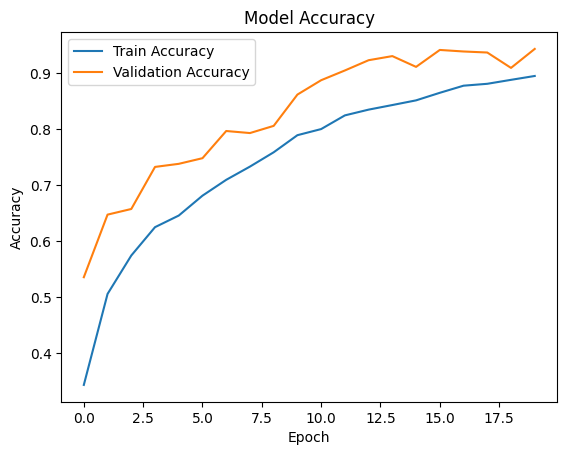

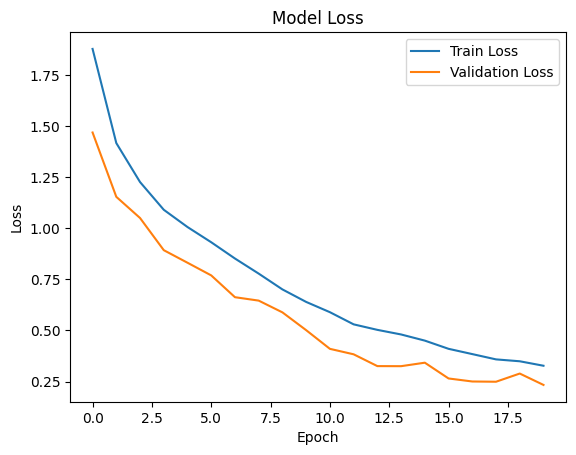

In [11]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# VGG16

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load VGG16 base model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
vgg_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Save the best model
checkpoint = ModelCheckpoint(
    filepath='models/vgg16_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1087 - loss: 2.5734
Epoch 1: val_accuracy improved from None to 0.24359, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 839s 4s/step - accuracy: 0.1480 - loss: 2.4295 - val_accuracy: 0.2436 - val_loss: 2.1533
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2529 - loss: 2.1602
Epoch 2: val_accuracy improved from 0.24359 to 0.41575, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 783s 4s/step - accuracy: 0.2671 - loss: 2.1156 - val_accuracy: 0.4158 - val_loss: 1.9783
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3256 - loss: 1.9719
Epoch 3: val_accuracy improved from 0.41575 to 0.53114, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.3324 - loss: 1.9443 - val_accuracy: 0.5311 - val_loss: 1.8470
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3920 - loss: 1.8536
Epoch 4: val_accuracy improved from 0.53114 to 0.55495, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 770s 4s/step - accuracy: 0.3971 - loss: 1.8308 - val_accuracy: 0.5549 - val_loss: 1.7472
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4523 - loss: 1.7317
Epoch 5: val_accuracy improved from 0.55495 to 0.62637, saving model to models/vgg16_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 774s 4s/step - accuracy: 0.4509 - loss: 1.7183 - val_accuracy: 0.6264 - val_loss: 1.6500


# MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MobileNetV2 base model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build model
mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best model
checkpoint = ModelCheckpoint(
    filepath='models/mobilenetv2_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model
history_mobilenet = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  #   Same approach as VGG16
    callbacks=[checkpoint]
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.2757 - loss: 2.1999
Epoch 1: val_accuracy improved from None to 0.83700, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 200s 999ms/step - accuracy: 0.4416 - loss: 1.6852 - val_accuracy: 0.8370 - val_loss: 0.8588
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.7222 - loss: 0.9024
Epoch 2: val_accuracy improved from 0.83700 to 0.91392, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 193s 989ms/step - accuracy: 0.7531 - loss: 0.8085 - val_accuracy: 0.9139 - val_loss: 0.4903
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 839ms/step - accuracy: 0.8284 - loss: 0.6044
Epoch 3: val_accuracy improved from 0.91392 to 0.93773, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 193s 988ms/step - accuracy: 0.8374 - loss: 0.5604 - val_accuracy: 0.9377 - val_loss: 0.3416
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.8667 - loss: 0.4506
Epoch 4: val_accuracy improved from 0.93773 to 0.95696, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 190s 973ms/step - accuracy: 0.8774 - loss: 0.4261 - val_accuracy: 0.9570 - val_loss: 0.2475
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.8894 - loss: 0.3765
Epoch 5: val_accuracy improved from 0.95696 to 0.95879, saving model to models/mobilenetv2_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 195s 998ms/step - accuracy: 0.8998 - loss: 0.3508 - val_accuracy: 0.9588 - val_loss: 0.2094


# EfficientNetB0

In [20]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load EfficientNetB0 base model
efficientnet_base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights=None)
efficientnet_base_model.trainable = False  # Freeze base model

# Add custom top layers
x = efficientnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
efficient_model = Model(inputs=efficientnet_base_model.input, outputs=predictions)

# Compile
efficient_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best model
checkpoint = ModelCheckpoint(
    filepath='models/efficientnetb0_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_efficientnet = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1713 - loss: 2.3959
Epoch 1: val_accuracy improved from None to 0.17125, saving model to models/efficientnetb0_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.1748 - loss: 2.3937 - val_accuracy: 0.1712 - val_loss: 2.3896
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.1801 - loss: 2.3865
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.1761 - loss: 2.3842 - val_accuracy: 0.1712 - val_loss: 2.3798
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1765 - loss: 2.3759
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.1761 - loss: 2.3733 - val_accuracy: 0.1712 - val_loss: 2.3690
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1738 - loss: 2.3654
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.1761 - loss: 2.3621 - val_accuracy: 0.1712 - val_loss: 2.3585
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1757 - loss: 2.3535
Epoch 5: val_accuracy did not improv

# ResNet50

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load ResNet50 base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Save best checkpoint
checkpoint = ModelCheckpoint(
    filepath='models/resnet50_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1354 - loss: 2.5774
Epoch 1: val_accuracy improved from None to 0.17125, saving model to models/resnet50_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.1438 - loss: 2.4386 - val_accuracy: 0.1712 - val_loss: 2.2874
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1623 - loss: 2.3025
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.1706 - loss: 2.2920 - val_accuracy: 0.1712 - val_loss: 2.2602
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1835 - loss: 2.2709
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.1796 - loss: 2.2668 - val_accuracy: 0.1712 - val_loss: 2.2391
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1829 - loss: 2.2518
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.1862 - loss: 2.2445 - val_accuracy: 0.1712 - val_loss: 2.2223
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1790 - loss: 2.2257
Epoch 5: val_accuracy improved from 0.1

195/195 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.1859 - loss: 2.2244 - val_accuracy: 0.1905 - val_loss: 2.2067


# InceptionV3

In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load InceptionV3 base model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
inception_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
inception_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best checkpoint
checkpoint = ModelCheckpoint(
    filepath='models/inceptionv3_fish.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_inception = inception_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3244 - loss: 2.0652
Epoch 1: val_accuracy improved from None to 0.81410, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.4790 - loss: 1.5751 - val_accuracy: 0.8141 - val_loss: 0.7750
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7238 - loss: 0.8721
Epoch 2: val_accuracy improved from 0.81410 to 0.88095, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.7502 - loss: 0.7955 - val_accuracy: 0.8810 - val_loss: 0.4920
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7888 - loss: 0.6465
Epoch 3: val_accuracy improved from 0.88095 to 0.89652, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.8071 - loss: 0.6007 - val_accuracy: 0.8965 - val_loss: 0.3850
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.8522 - loss: 0.4775
Epoch 4: val_accuracy improved from 0.89652 to 0.90568, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.8522 - loss: 0.4771 - val_accuracy: 0.9057 - val_loss: 0.3374
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8596 - loss: 0.4415
Epoch 5: val_accuracy improved from 0.90568 to 0.93407, saving model to models/inceptionv3_fish.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.8686 - loss: 0.4163 - val_accuracy: 0.9341 - val_loss: 0.2667


# Compare & Select Best Model Print Validation Accuracies

In [23]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model_path, val_generator):
    print(f"\n Evaluation Report for {model_path}")

    # Load model
    model = load_model(model_path)

    # Predict
    Y_pred = model.predict(val_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Confusion Matrix: {model_path}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Evaluation Report for models/vgg16_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step


c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

                                  precision    recall  f1-score   support

                     animal fish       0.71      0.97      0.82       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.58      0.50      0.53       105
   fish sea_food gilt_head_bream       0.52      0.12      0.19        94
   fish sea_food hourse_mackerel       0.42      0.87      0.57        97
        fish sea_food red_mullet       0.41      0.48      0.44        90
     fish sea_food red_sea_bream       0.64      0.70      0.67       113
          fish sea_food sea_bass       0.66      0.47      0.55        97
            fish sea_food shrimp       0.69      0.68      0.68       100
fish sea_food striped_red_mullet       0.70      0.19      0.30       101
             fish sea_food trout       0.73      0.74      0.74        98

                        accuracy                           0.60      1092
                       macro avg    

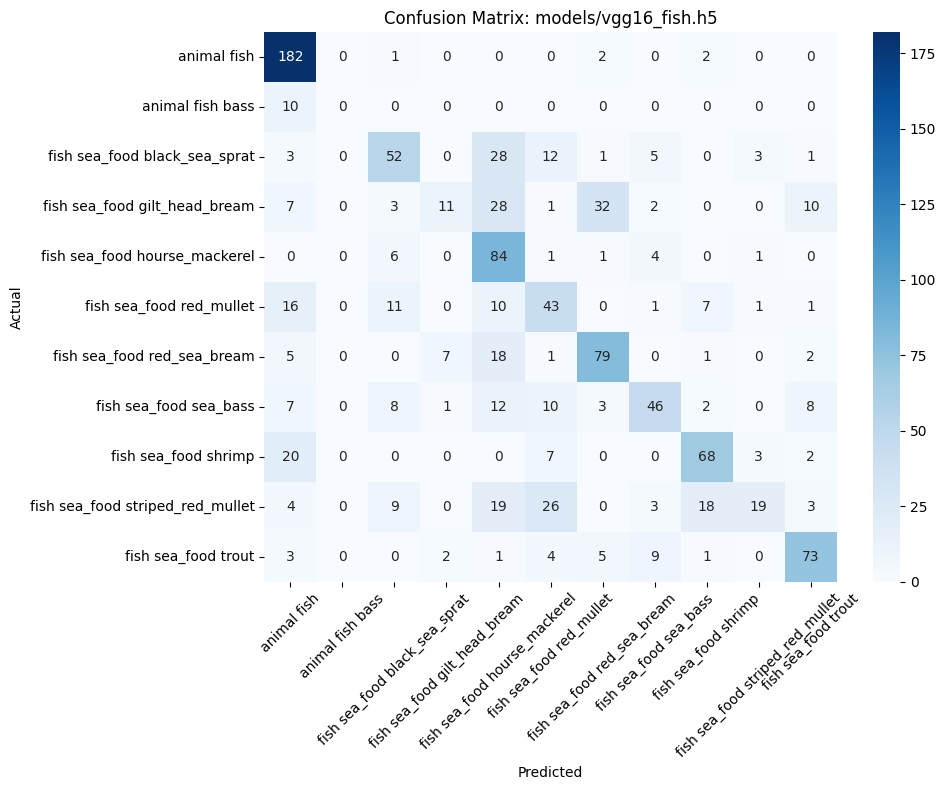


 Evaluation Report for models/mobilenetv2_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 864ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.94      0.97      0.96       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.98      0.96      0.97       105
   fish sea_food gilt_head_bream       0.94      0.97      0.95        94
   fish sea_food hourse_mackerel       0.94      0.96      0.95        97
        fish sea_food red_mullet       0.95      0.97      0.96        90
     fish sea_food red_sea_bream       0.98      0.97      0.98       113
          fish sea_food sea_bass       0.98      0.93      0.95        97
            fish sea_food shrimp       0.97      1.00      0.99       100
fish sea_food striped_red_mullet       0.92      0.91      0.92       101
             fish sea_food trout       0.96      0.99      0.97        98

                        accuracy                           0.96     

c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

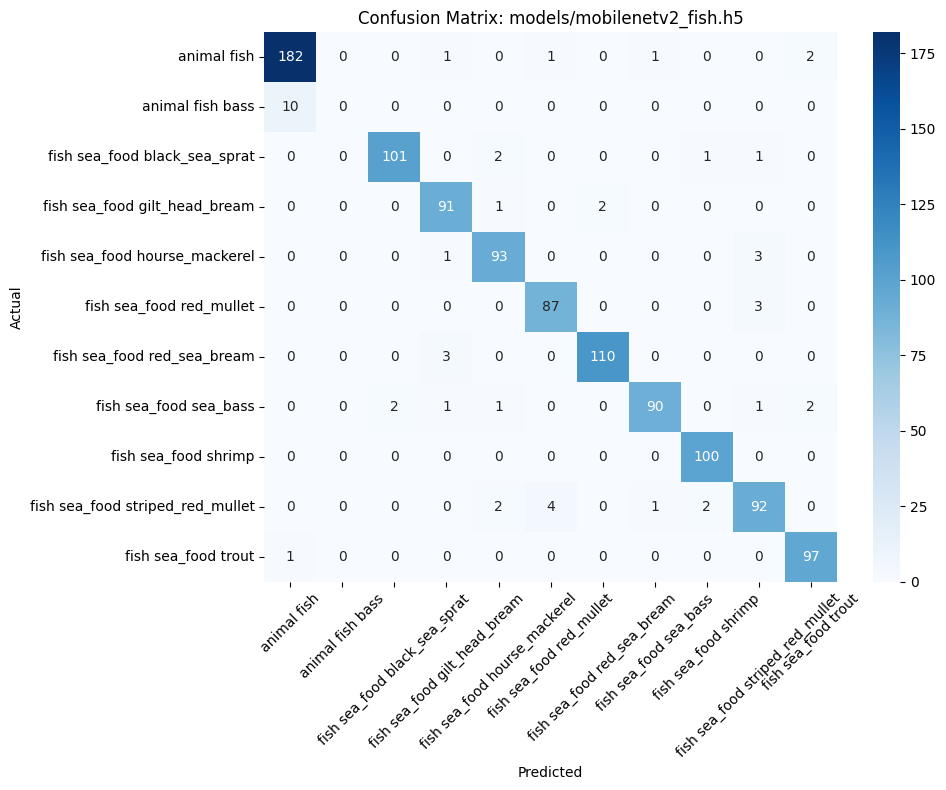


 Evaluation Report for models/efficientnetb0_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 978ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17     

c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

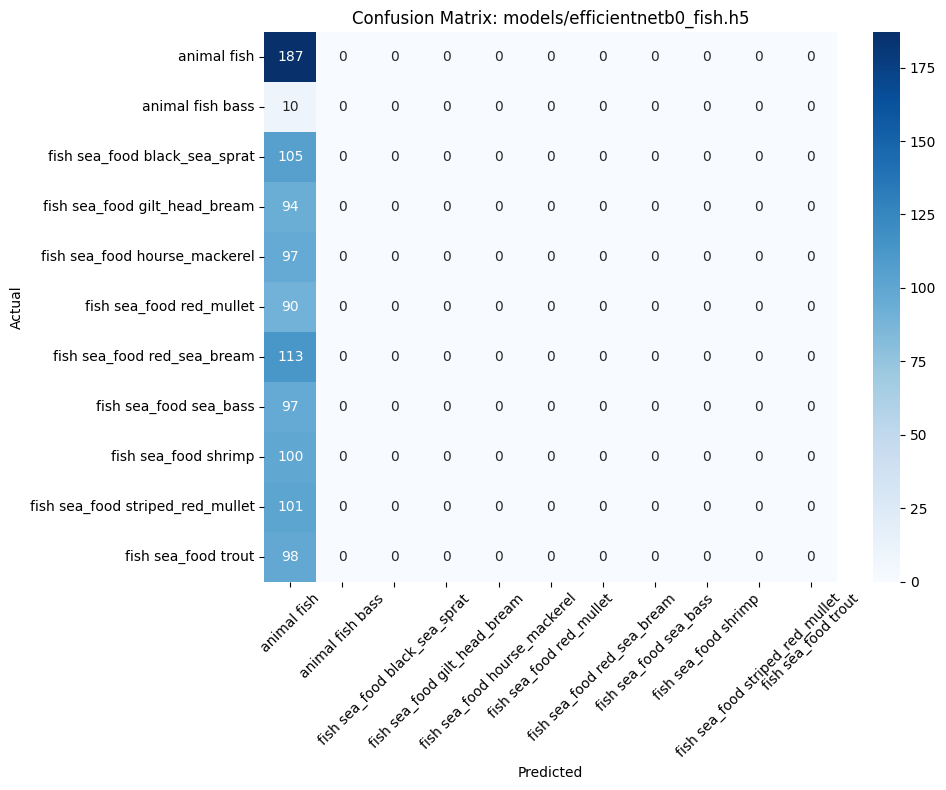


 Evaluation Report for models/resnet50_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step
                                  precision    recall  f1-score   support

                     animal fish       0.20      0.84      0.32       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.20      0.01      0.02        94
   fish sea_food hourse_mackerel       0.17      0.01      0.02        97
        fish sea_food red_mullet       0.28      0.10      0.15        90
     fish sea_food red_sea_bream       0.28      0.04      0.08       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.21      0.46      0.28       100
fish sea_food striped_red_mullet       0.33      0.04      0.07       101
             fish sea_food trout       0.50      0.02      0.04        98

                        accuracy                           0.21      10

c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

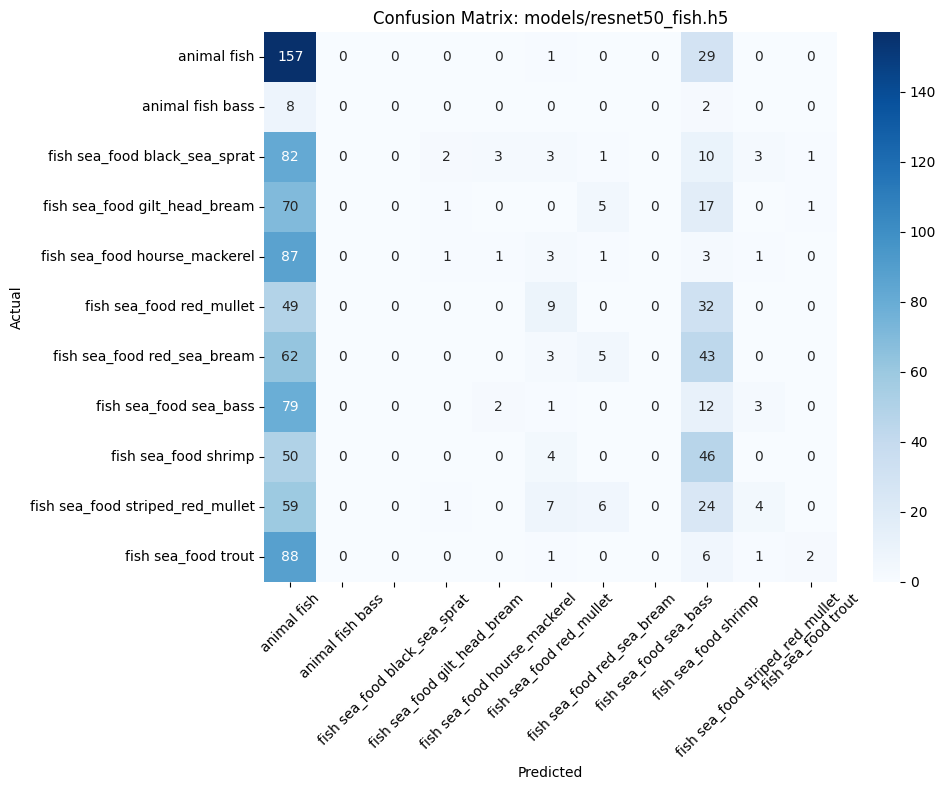


 Evaluation Report for models/inceptionv3_fish.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step
                                  precision    recall  f1-score   support

                     animal fish       0.91      0.99      0.95       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.93      0.94      0.93       105
   fish sea_food gilt_head_bream       0.85      0.90      0.88        94
   fish sea_food hourse_mackerel       0.91      0.96      0.93        97
        fish sea_food red_mullet       0.84      0.92      0.88        90
     fish sea_food red_sea_bream       0.95      0.88      0.92       113
          fish sea_food sea_bass       0.92      0.82      0.87        97
            fish sea_food shrimp       0.97      1.00      0.99       100
fish sea_food striped_red_mullet       0.91      0.76      0.83       101
             fish sea_food trout       0.92      0.94      0.93        98

                        accuracy                           0.91      10

c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

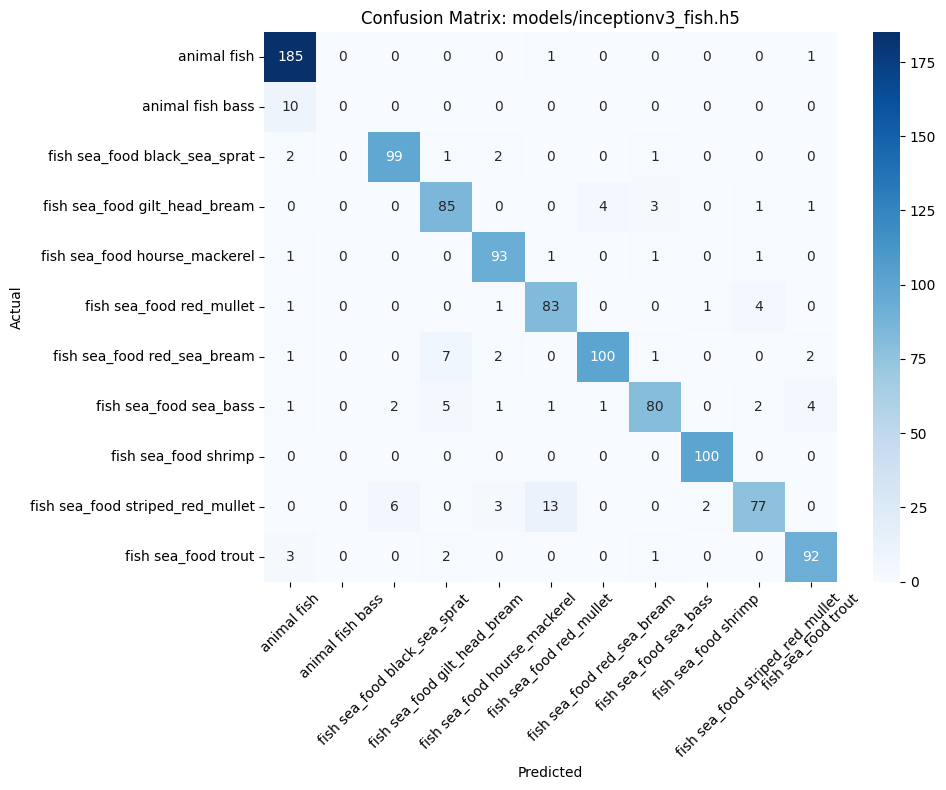

In [24]:
evaluate_model("models/vgg16_fish.h5", val_generator)
evaluate_model("models/mobilenetv2_fish.h5", val_generator)
evaluate_model("models/efficientnetb0_fish.h5", val_generator)
evaluate_model("models/resnet50_fish.h5", val_generator)
evaluate_model("models/inceptionv3_fish.h5", val_generator)

# Fine-tuned model

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# 1. Load your best pretrained model
model = load_model('models/mobilenetv2_fish.h5')

# 2. Unfreeze some top layers of base model
model.trainable = True
for layer in model.layers[:-30]:  # Freeze all except the last ~30 layers
    layer.trainable = False

# 3. Re-compile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Setup callbacks
checkpoint = ModelCheckpoint(
    filepath='models/mobilenetv2_fish_finetuned.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 5. Train the fine-tuned model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, lr_scheduler, earlystop]
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.9087 - loss: 0.3046
Epoch 1: val_accuracy improved from None to 0.95330, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9113 - loss: 0.3034 - val_accuracy: 0.9533 - val_loss: 0.1997 - learning_rate: 1.0000e-05
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.9154 - loss: 0.2982
Epoch 2: val_accuracy improved from 0.95330 to 0.96612, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 186s 953ms/step - accuracy: 0.9157 - loss: 0.3009 - val_accuracy: 0.9661 - val_loss: 0.1912 - learning_rate: 1.0000e-05
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.9192 - loss: 0.2759
Epoch 3: val_accuracy did not improve from 0.96612
195/195 ━━━━━━━━━━━━━━━━━━━━ 191s 982ms/step - accuracy: 0.9158 - loss: 0.2929 - val_accuracy: 0.9634 - val_loss: 0.1878 - learning_rate: 1.0000e-05
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.9155 - loss: 0.2914
Epoch 4: val_accuracy did not improve from 0.96612
195/195 ━━━━━━━━━━━━━━━━━━━━ 188s 964ms/step - accuracy: 0.9163 - loss: 0.2930 - val_accuracy: 0.9625 - val_loss: 0.1936 - learning_rate: 1.0000e-05
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9221 - loss: 0.2720
Epoch 5: val_accuracy improved from 0.96612 to 0.97161, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9239 - loss: 0.2749 - val_accuracy: 0.9716 - val_loss: 0.1763 - learning_rate: 1.0000e-05
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.9248 - loss: 0.2800
Epoch 6: val_accuracy did not improve from 0.97161
195/195 ━━━━━━━━━━━━━━━━━━━━ 173s 885ms/step - accuracy: 0.9245 - loss: 0.2759 - val_accuracy: 0.9588 - val_loss: 0.1790 - learning_rate: 1.0000e-05
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.9335 - loss: 0.2564
Epoch 7: val_accuracy did not improve from 0.97161
195/195 ━━━━━━━━━━━━━━━━━━━━ 194s 993ms/step - accuracy: 0.9245 - loss: 0.2712 - val_accuracy: 0.9570 - val_loss: 0.1877 - learning_rate: 1.0000e-05
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 0.9301 - loss: 0.2628
Epoch 8: val_accuracy did not improve from 0.97161

Epoch 8: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
195/195 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9277 -

195/195 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9231 - loss: 0.2600 - val_accuracy: 0.9725 - val_loss: 0.1682 - learning_rate: 5.0000e-06
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.9291 - loss: 0.2526
Epoch 10: val_accuracy improved from 0.97253 to 0.97344, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9253 - loss: 0.2595 - val_accuracy: 0.9734 - val_loss: 0.1550 - learning_rate: 5.0000e-06



 Evaluation Report for models/mobilenetv2_fish_finetuned.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 942ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.95      0.98      0.96       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.93      0.97      0.95       105
   fish sea_food gilt_head_bream       0.99      0.98      0.98        94
   fish sea_food hourse_mackerel       0.95      0.97      0.96        97
        fish sea_food red_mullet       0.97      0.99      0.98        90
     fish sea_food red_sea_bream       1.00      0.99      1.00       113
          fish sea_food sea_bass       0.94      0.91      0.92        97
            fish sea_food shrimp       0.96      1.00      0.98       100
fish sea_food striped_red_mullet       0.98      0.90      0.94       101
             fish sea_food trout       0.95      0.99      0.97        98

                        accuracy                           0.96     

c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ALDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

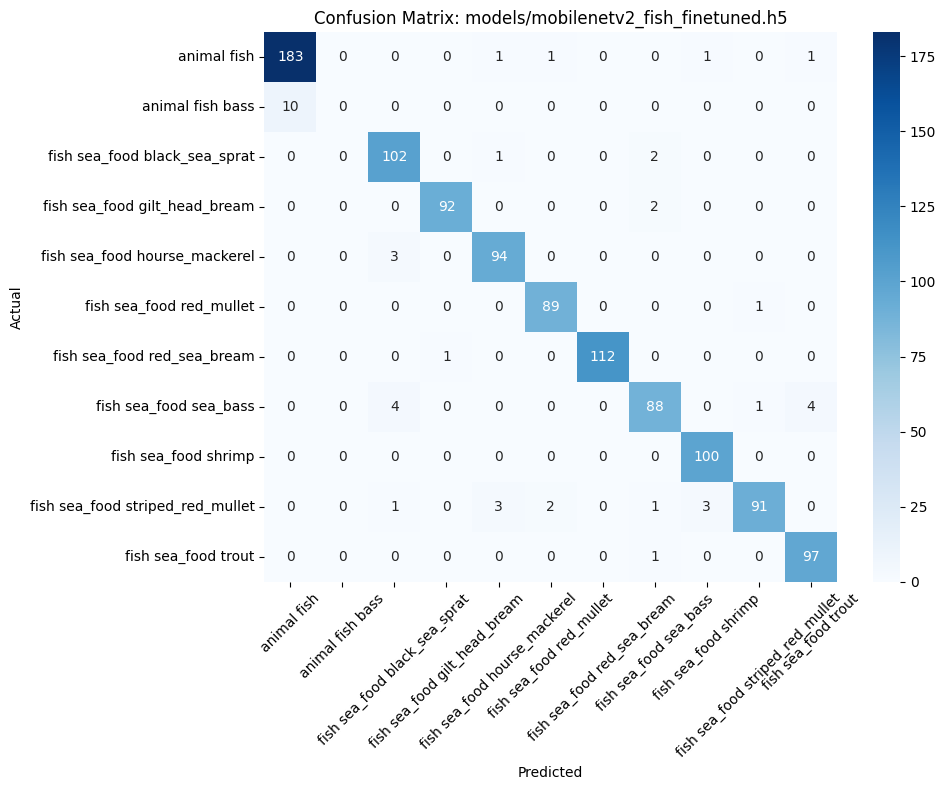

In [26]:
evaluate_model("models/mobilenetv2_fish_finetuned.h5", val_generator)

In [27]:
import shutil
shutil.copy("models/mobilenetv2_fish_finetuned.h5", "models/best_model.h5")

'models/best_model.h5'

In [28]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

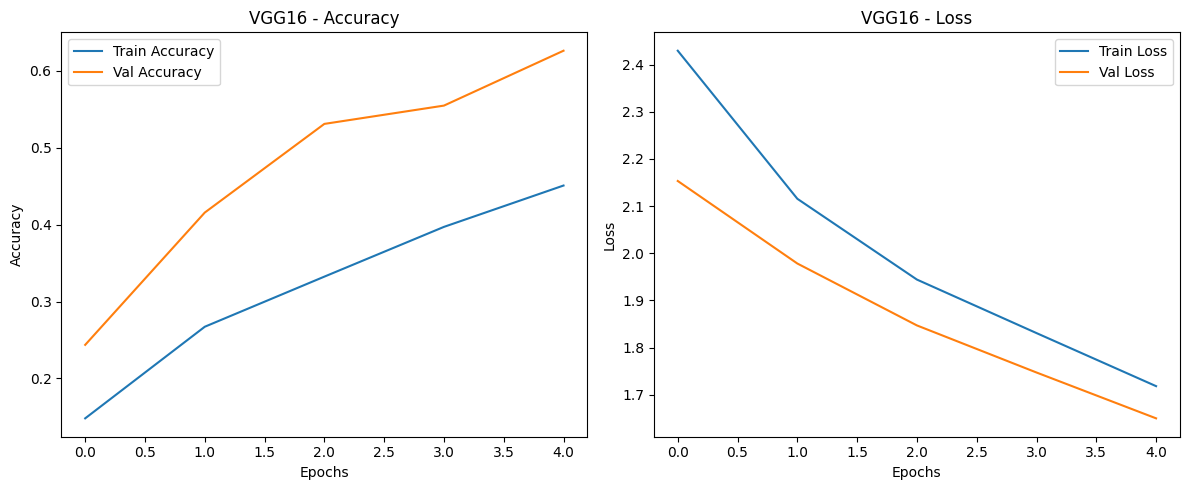

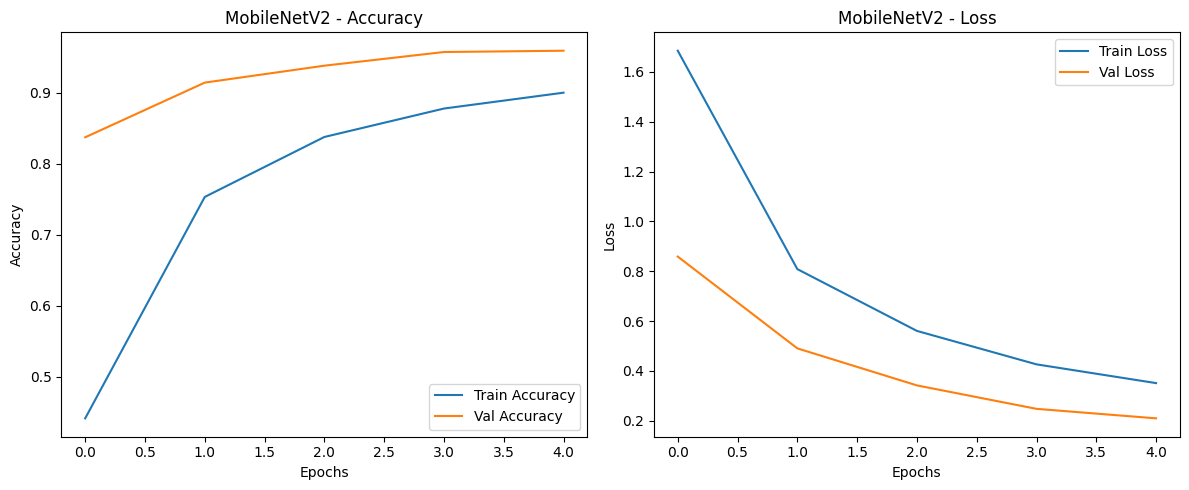

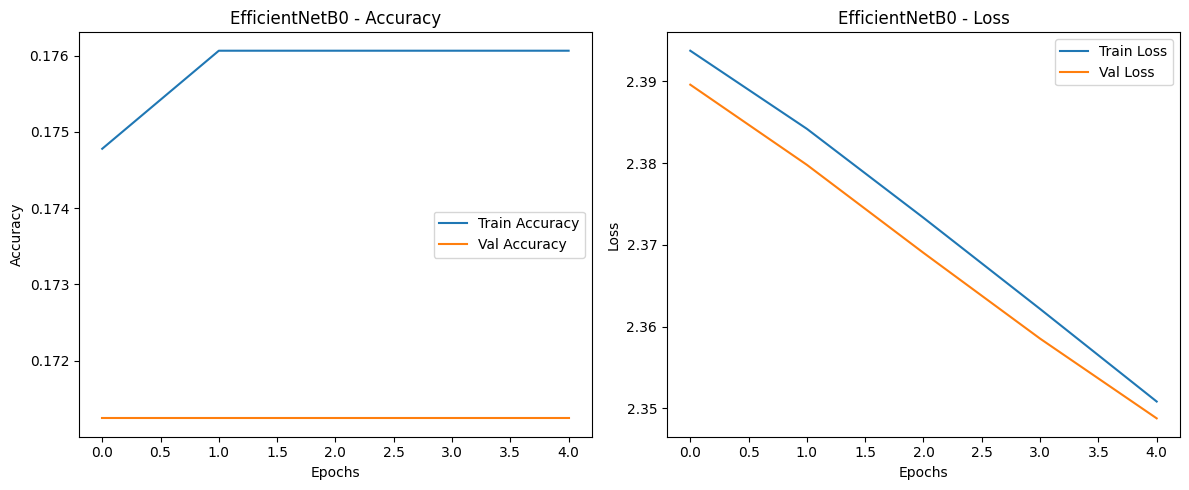

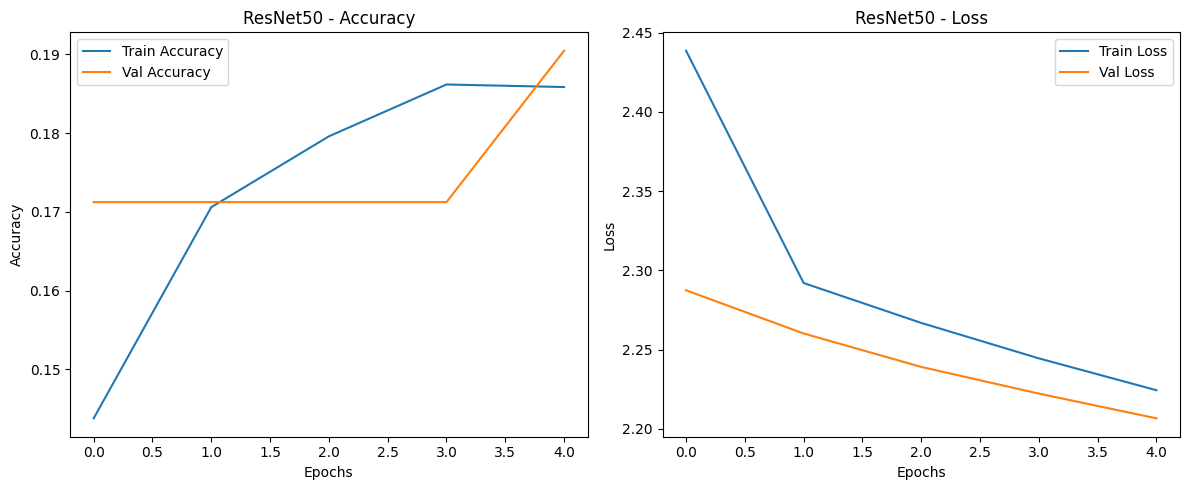

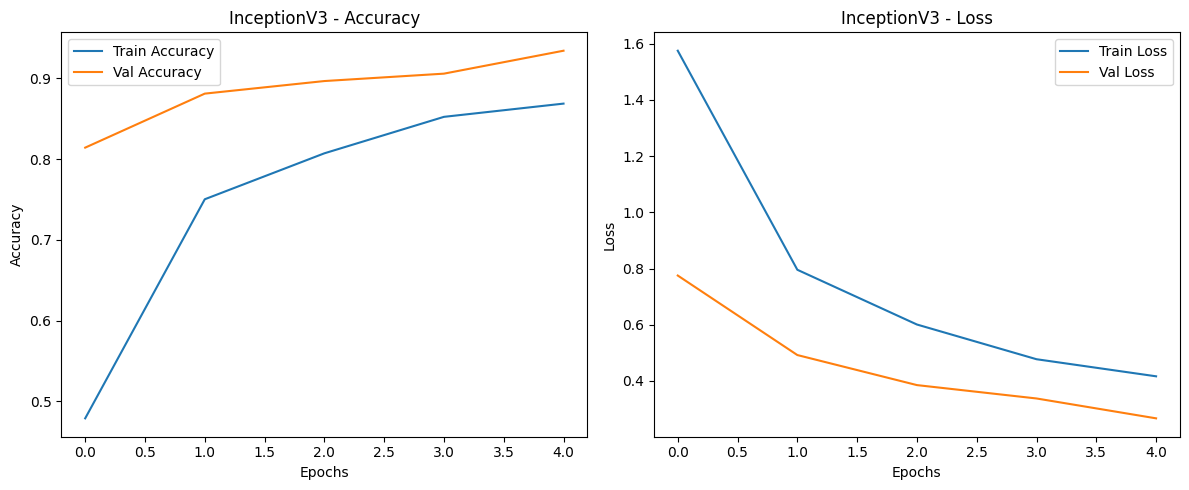

In [29]:
plot_training_history(history_vgg, "VGG16")
plot_training_history(history_mobilenet, "MobileNetV2")
plot_training_history(history_efficientnet, "EfficientNetB0")
plot_training_history(history_resnet, "ResNet50")
plot_training_history(history_inception, "InceptionV3") 

In [1]:
# RUN THIS CELL in your Fish_image.ipynb
import os
print("D:/fish_image/models")
print(os.listdir('models/'))


D:/fish_image/models
['best_model.h5', 'efficientnetb0_fish.h5', 'fish_cnn_model.h5', 'inceptionv3_fish.h5', 'mobilenetv2_fish.h5', 'mobilenetv2_fish_finetuned.h5', 'resnet50_fish.h5', 'vgg16_fish.h5']
